In [1]:
import numpy as np
import matplotlib.pyplot as plt

def Sigmoid(x):
    return 1/(1+np.exp(-x))

def diffSigmoid(x):
    f = Sigmoid(x)
    return f*(1-f)

def ReLU(x):
    return np.maximum(0.0,x)

def diffReLU(x):
    return np.where(x <= 0, 0.0, 1.0)


In [2]:
def SSE(x,y):
    a = x - y
    return sum(a*a)

def MSE(x,y):
    a = x - y
    return (a*a).mean()

def diffMSE(x,y):
    a = x - y
    return -2*(a)

def ForwardPropagation(weight,bias,input_layer,activation):
    if activation == "Sigmoid" :
        output_layer = Sigmoid(np.dot(weight,input_layer)+bias)
    if activation == "ReLU" :
        output_layer = ReLU(np.dot(weight,input_layer)+bias)
    return output_layer

def BackPropagation(input_layer,output_layer,activation):
    if activation == "Sigmoid" :
        return np.dot(diffSigmoid(output_layer),input_layer.T) , diffSigmoid(output_layer)
    if activation == "ReLU" :
        return np.dot(diffReLU(output_layer),input_layer.T) , diffReLU(output_layer)

def Update(learn_rate,weight,bias,diff_weight,diff_bias):
    return weight-learn_rate*diff_weight , bias-learn_rate*diff_bias
    

In [3]:
input_layer  = np.array([-2,0,7]).reshape(-1,1)
label        = np.array([[0],[1]])
output_layer = np.random.randn(label.size).reshape(-1,1)
epochs       = 100
learn_rate   = 0.1

hidden_neural = 3

loss_ = []

hidden_layer_weight = np.random.randn(hidden_neural,len(input_layer))
hidden_layer_bias   = np.random.randn(hidden_neural, 1)

output_layer_weight = np.random.randn(len(output_layer), hidden_neural)
output_layer_bias   = np.random.randn(len(output_layer), 1)

for epoch in range(epochs):

    hidden_layer = ForwardPropagation(hidden_layer_weight,hidden_layer_bias,input_layer,activation="Sigmoid")
    output_layer = ForwardPropagation(output_layer_weight,output_layer_bias,hidden_layer,activation="Sigmoid")

    loss         = MSE(label,output_layer)
    diff_output_layer_loss = diffMSE(label,output_layer)

    ##############################################################################################

    diff_output_layer_weight,diff_output_layer_bias = BackPropagation(hidden_layer,output_layer,activation="Sigmoid")
    
    diff_output_layer_weight  *= diff_output_layer_loss
    diff_output_layer_bias    *= diff_output_layer_loss

    ##############################################################################################
    
    diff_hidden_layer_weight,diff_hidden_layer_bias = BackPropagation(input_layer,hidden_layer,activation="Sigmoid")    
    diff_hidden_layer_loss     = np.dot(output_layer_weight.T,diff_output_layer_loss)

    diff_hidden_layer_weight  *= diff_hidden_layer_loss
    diff_hidden_layer_bias    *= diff_hidden_layer_loss 
    
    ##############################################################################################

    hidden_layer_weight,hidden_layer_bias = Update(learn_rate,hidden_layer_weight,hidden_layer_bias,diff_hidden_layer_weight,diff_hidden_layer_bias)
    
    output_layer_weight,output_layer_bias = Update(learn_rate,output_layer_weight,output_layer_bias,diff_output_layer_weight,diff_output_layer_bias)
    
    loss_.append(loss)
    #if epoch % 1 == 0:
    #    print("Epoch %d loss: %.3f" % (epoch, loss))


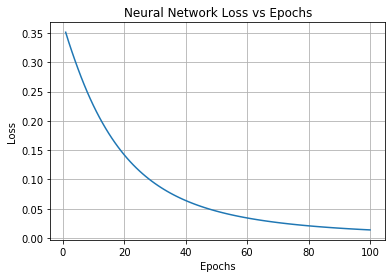

In [4]:
plt.plot(np.arange(1,epochs+1),loss_)
plt.title('Neural Network Loss vs Epochs',fontsize=12)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.show()